# <font>2.1. Regressão Linear Simples</font>
---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 15px; right: 20px; border-radius: 5px;" />

## Roteiro da Aula

1. Correlação vs Regressão Linear
2. Regressão Linear: Conceitos Iniciais
3. Entendendo a regressão linear na prática
4. Como encontrar a reta de regressão ideal? (Minimizando o erro)
5. Exemplo prático: Peso e Altura  
    - Conhecendo as bibliotecas: `sklearn` e `statsmodels`  
    - Modelo com a presença de outliers  
6. Características do Erro
7. Métricas para Análise dos Erros

---

## 1. Correlação vs Regressão Linear

### O que é correlação?

Trata-se de uma medida da relação entre diferentes variáveis. Os coeficientes de correlação auxiliam os pesquisadores a mensurar essa relação. Os coeficientes de correlação são métodos estatísticos para se medir as relações entre variáveis e o que elas representam.

O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas. Embora não implique em causalidade, o coeficiente de correlação exprime em números essa relação, ou seja, quantifica a relação entre as variáveis.

<img style="border-radius: 10px" src="https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img1-2.png?w=1500" style="display: block; margin: 2rem  auto;" />

Mas não existe apenas uma forma de se calcular a correlação entre variáveis. Dependendo da forma e de como se comportam as variáveis, um coeficiente de correlação é mais adequado que outro.

### Coeficiente de Correlação de Pearson
O coeficiente de correlação de Pearson (r), também chamado de correlação linear ou r de Pearson, é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre -1 e 1.

Quando  o coeficiente de correlação se aproxima de 1, nota-se um aumento no valor de uma variável quando a outra também aumenta, ou seja, há uma relação linear positiva. Quando o coeficiente se aproxima de -1, também é possível dizer que as variáveis são correlacionadas, mas nesse caso quando o valor de uma variável aumenta o da outra diminui. Isso é o que é chamado de correlação negativa ou inversa.

Um coeficiente de correlação próximo de zero indica que não há relação entre as duas variáveis, e quanto mais eles se aproximam de 1 ou  -1, mais forte é a relação.

<img style="border-radius: 10px" src="https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?w=1500" />

### Coeficiente de Correlação de Spearman
Denominado pela letra grega rho (ρ), o coeficiente de correlação de postos de Spearman é uma medida de correlação não paramétrica também avaliado no intervalo entre -1 e 1.

Ao contrário do coeficiente de Pearson, o coeficiente de Spearman não exige a suposição de que a relação entre as variáveis seja linear, nem requer que as mesmas sejam quantitativas – pode inclusive ser utilizado para verificar relação entre variáveis medidas no nível ordinal.

### Coeficiente de Correlação de Kendall
Expresso pela letra grega tau (τ), o coeficiente de correlação de Kendall é uma medida de associação para variáveis ordinais. Uma vantagem de tau sobre o coeficiente de Spearman é a possibilidade de ser generalizado para um coeficiente de correlação parcial.


<img style="display: block; margin: 2rem  auto; width: 400px; height: 600px; object-fit: cover; object-position: 0px 112%; border-radius: 10px" src="https://escoladedados.org/wp-content/uploads/2021/07/correlacao.png">


<div style="display: flex; justify-content: center;">

| Correlação | Regressão |
|:----------:|:---------:|
| Mede o grau de relação entre duas variáveis | Uma variável afeta a outra |
| Grau de interelação | Baseada na causalidade (Causa e efeito) |
| $\rho(x,y)$ = $\rho(y,x)$ | Unidirecional |
| Único ponto | Linha |

</div>

### Correlação não implica em causalidade!

Dizer que Correlação não implica em Causalidade, quer dizer que duas coisas correlacionadas não implicam, necessariamente, no fato de uma ser causa da outra. Um exemplo palpável que cabe bem à situação seria a seguinte afirmativa: em países do hemisfério norte nota-se que as pessoas tendem a gastar mais em compras no frio.

Apesar do gasto em compras estar correlacionado negativamente com a temperatura (- temperatura, + compras), não quer dizer que o frio cause um aumento nas vendas. Uma explicação mais plausível para esse constatado é que datas festivas — como o Natal, por exemplo — coincidem com épocas de frio nos países situados ao norte da Linha do Equador.


> [Link para os slides](https://docs.google.com/presentation/d/1zs6WbS1VQDykVvi3rduVnlG_NTlH9V3Q/edit?usp=sharing&ouid=100697162582615560133&rtpof=true&sd=true)

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

sns.set()
pio.templates.default = 'plotly_dark'

## 2. Regressão Linear: Conceitos iniciais

Vejamos a importância da escolha do coeficiente ideal na prática...

In [2]:
# Criando um exemplo simples
x = np.arange(6)

In [3]:
x

array([0, 1, 2, 3, 4, 5])

In [4]:
y = x

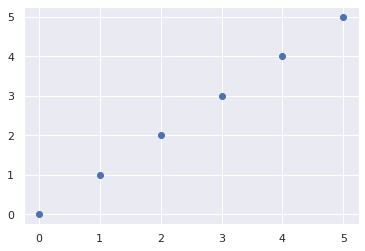

In [11]:
# Visualizando os dados

plt.scatter(x, y)

In [6]:
# beta1 = 1
# beta0 = 0

### Equação da reta de regressão

$$
y = \beta_1x + \beta_0 = ax + b
$$

- $\beta_1$: coeficiente que multiplica a variável independente
- $\beta_0$: intercepto

In [7]:
b0 = 0 # Beta0, que já sabemos que é igual a zero

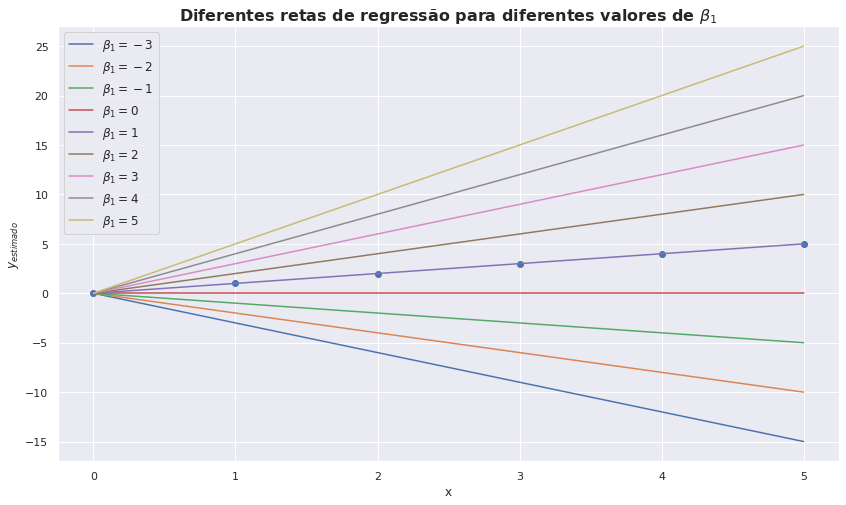

In [10]:
# Visualizando diferentes retas de regressão para diferentes

plt.figure(figsize=(14,8))
plt.scatter(x, y) # Dados originais

coeficiente_erro = [] # Primeiro elemento vai ser o valor do coeficiente, e o segundo elemento vai ser o erro associado a ele

# Fazendo o coeficiente beta1 variar
for b1 in range(-3, 6):
  y_estimado = b0 + b1*x # Isso gera um array

  plt.plot(x, y_estimado, label=f'$\\beta_1 = {b1}$')

  erro = y - y_estimado

  SQE = sum(erro**2) # Soma quadrática dos erros

  coeficiente_erro.append([b1, SQE])

plt.legend(fontsize=12)
plt.title('Diferentes retas de regressão para diferentes valores de $\\beta_1$', fontsize=16, fontweight='bold')
plt.xlabel('x')
plt.ylabel('$y_{estimado}$')
plt.show()

No nosso caso, $y = x$, então, $\beta_0 = 0$, $\beta_1 = 1$.

In [26]:
coeficiente_erro

[[-3, 880],
 [-2, 495],
 [-1, 220],
 [0, 55],
 [1, 0],
 [2, 55],
 [3, 220],
 [4, 495],
 [5, 880]]

In [18]:
erros = np.array(coeficiente_erro)

In [19]:
erros

array([[ -3, 880],
       [ -2, 495],
       [ -1, 220],
       [  0,  55],
       [  1,   0],
       [  2,  55],
       [  3, 220],
       [  4, 495],
       [  5, 880]])

In [20]:
erros[:,0]

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

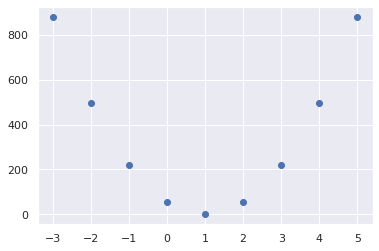

In [21]:
plt.scatter(erros[:,0], erros[:,1])

### Calculando os coeficientes $\beta_0$ e $\beta_1$ por meio das equações

$$
\beta_1 = \frac{\sum_{i=1}^N (x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [22]:
x

array([0, 1, 2, 3, 4, 5])

In [23]:
y

array([0, 1, 2, 3, 4, 5])

In [12]:
x_mean = x.mean()
y_mean = y.mean()

In [14]:
x_mean, y_mean

(2.5, 2.5)

In [15]:
# Calculando o beta1

num = (x - x_mean) * (y - y_mean)
den = (x - x_mean)**2

In [19]:
beta1 = sum(num) / sum(den)

In [20]:
beta0 = y_mean - beta1 * x_mean

In [21]:
beta0

0.0

## Regressão Linear Simples: Altura $\Rightarrow$ Peso

In [22]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/28c52b9b-6c44-406b-9f67-a297e1193365.csv')

In [23]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Conversão das unidades

In [25]:
# Conversão de polegadas para cm
df['altura'] = df['Height'] * 2.54

In [26]:
# Conversão de libras para kg
df['peso'] = df['Weight'] * 0.453592

In [27]:
df.head()

,Gender,Height,Weight,altura,peso
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499761,93.598619


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
 3   altura  10000 non-null  float64
 4   peso    10000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 390.8+ KB


In [29]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [30]:
df.describe()

,Height,Weight,altura,peso
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,168.573602,73.228054
std,3.847528,32.108439,9.772721,14.564131
min,54.263133,64.700127,137.828359,29.347460
25%,63.505620,135.818051,161.304276,61.605982
50%,66.318070,161.212928,168.447898,73.124894
75%,69.174262,187.169525,175.702625,84.898599
max,78.998742,269.989699,200.656806,122.465167


### Visualização gráfica

In [37]:
px.scatter(df, x='altura', y='peso', width=800, height=600, marginal_x='histogram', marginal_y='histogram')

In [45]:
plt.style.use('seaborn')

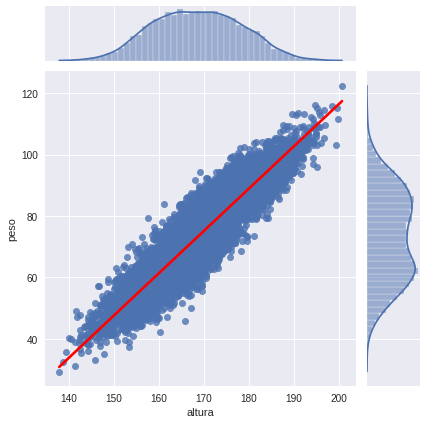

In [46]:
sns.jointplot(data=df, x='altura', y='peso', kind='reg', joint_kws={'line_kws':{'color':'red'}})

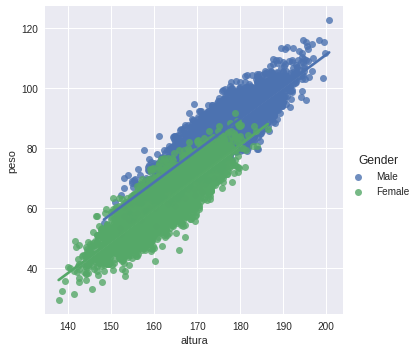

In [47]:
sns.lmplot(data=df, x='altura', y='peso', hue='Gender')

<AxesSubplot:xlabel='altura', ylabel='Count'>

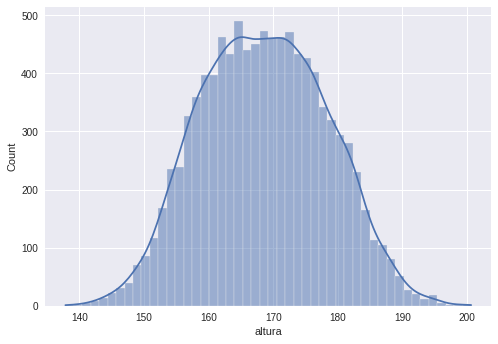

In [49]:
sns.histplot(df['altura'], kde=True)

<AxesSubplot:xlabel='peso', ylabel='Count'>

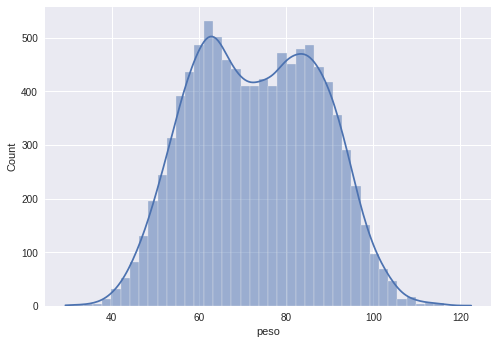

In [50]:
sns.histplot(df['peso'], kde=True)

<AxesSubplot:xlabel='peso', ylabel='Count'>

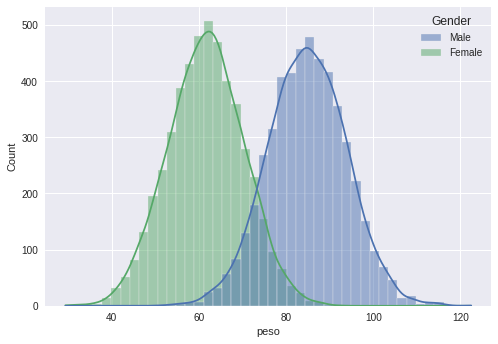

In [52]:
sns.histplot(data=df, x='peso', kde=True, hue='Gender')

### Calculando a correlação entre as features

In [53]:
from scipy.stats import pearsonr

- $H_0$: Os nossos dados não possuem uma correlação forte
- $H_1$: Os nossos dados **possuem** uma correlação forte

In [55]:
correlacao, p_value = pearsonr(df['altura'], df['peso'])

if p_value <= 0.05:
  print('Rejeita a hipótese H0, ou seja, os nossos dados possuem uma correlação alta')
else:
  print('Aceita H0, ou seja, os nossos dados NÃO possuem uma correlação alta')

Rejeita a hipótese H0, ou seja, os nossos dados possuem uma correlação alta


In [58]:
correlacao

0.924756298740915

In [57]:
df.corr()

,Height,Weight,altura,peso
Height,1.000000,0.924756,1.000000,0.924756
Weight,0.924756,1.000000,0.924756,1.000000
altura,1.000000,0.924756,1.000000,0.924756
peso,0.924756,1.000000,0.924756,1.000000


- Correlação muito forte: [-1, -0.8] or [0.8, 1]

### Separando variáveis

In [59]:
# Variável de entrada
X = df['altura']

# Variável de saída
y = df['peso']

### Calculando os coeficientes da RL para os nossos dados

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [60]:
x_mean = X.mean()
y_mean = y.mean()

In [61]:
x_mean, y_mean

(168.57360177724598, 73.22805433651739)

In [62]:
# Calculando o beta1

num = (X - x_mean) * (y - y_mean)
den = (X - x_mean)**2

In [63]:
beta1 = sum(num) / sum(den)

In [64]:
beta1

1.3781495809287967

In [65]:
beta0 = y_mean - beta1 * x_mean

In [66]:
beta0

-159.091584308452

In [67]:
# Coeficientes
beta0, beta1

(-159.091584308452, 1.3781495809287967)

In [69]:
y_est = beta0 + beta1 * X

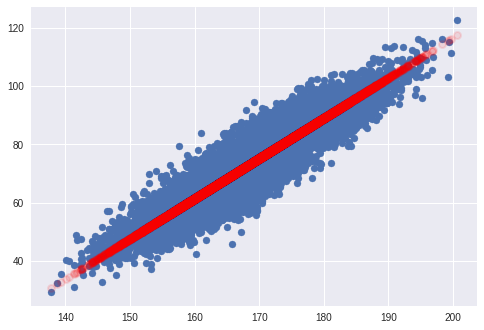

In [74]:
plt.scatter(X, y)
plt.scatter(X, y_est, c='red', linewidth=2, alpha=0.1)

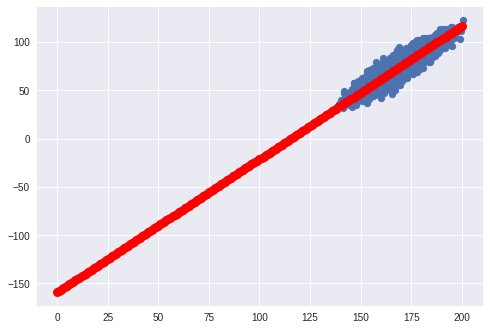

In [75]:
x_0_200 = np.arange(201)

y_est_exemplo = beta0 + beta1 * x_0_200

plt.scatter(X, y) # Plotando os dados originais
plt.scatter(x_0_200, y_est_exemplo, c='red', linewidth=2)

In [ ]:
# y_est = -159.09 + 1.38 * x

### Scikit Learn

---

### Statsmodels

## Influência dos Outliers

### Obtendo apenas 100 amostras (como array)

### Modelo sem a presença dos outliers

### Modelo com a presença dos outliers

## Características dos Resíduos

#### 1. Não devem ser correlacionados

#### Sem outliers

#### Com outliers

### 2. Ter média zero

#### Sem outliers

#### Com outliers

### 4. Distribuição normal dos resíduos

#### Sem outliers

#### Com outliers

## Métricas para Análise dos Erros

$$
SQE = \sum_{i=1}^N \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - \hat{y}_i\right]^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - (\beta_0 + \beta_1x_i)\right]^2
$$

$$
SQT = \sum_{i=1}^N \left(\hat{y}_i - \overline{y}\right)^2
$$

$$
SQExp = \sum_{i=1}^N \left(y_i - \overline{y}\right)^2
$$

### 1. R-Quadrado ($R^2$)

Quanto mais "espalhados" estiverem os pontos em torno da reta, em geral **pior é o modelo**, pois ele está errando mais!

Uma forma de quantificar isso através de uma métrica conhecida como **$R^2$**, o **coeficiente de determinação**.

Este coeficiente indica **o quão próximos os dados estão da reta ajustada**. Por outro lado, o $R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo. Também conhecido como **percentual de variância explicada**.

$$
R^2 = 1 - \frac{SQE}{SQT} = \frac{SQT - SQExp}{SQT} = \frac{SQExp}{SQT}
$$

$$
R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}
$$

> É possível utilizar o $R^2$ nos dados de treino, mas isso não é tão significante, devido ao *overfitting*, que discutiremos a seguir. Mais significativo é calcularmos o $R^2$ nos dados de teste como faremos a seguir.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/13389132-5482-4e97-a00a-86a6b1ce9d4a.png" width=600 style="margin: 2rem auto; display: block;" />

### 2. MAE

### 3. MSE

### 4. RMSE

### 5. RMSLE

### Treino/Teste